In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
youtube = pd.read_csv("USvideos.csv")
youtube = youtube[youtube['category_id']==26]

# Create a dataframe called "youtube"
We will only keep the columns 'title', 'tags', 'views', 'trending_date', and 'publish_time'. We also drop any rows with null values.

In [3]:
youtube = youtube[['title','tags','views','trending_date','publish_time']]
youtube = youtube.dropna()
youtube.head()

,title,tags,views,trending_date,publish_time
23,"What $4,800 Will Get You In NYC | Sweet Digs H...","refinery29|""refinery 29""|""r29""|""r29 video""|""vi...",145921,17.14.11,2017-11-12T16:00:01.000Z
27,A Smart... MUG?! - Take apart a Heated Thermos!,"Smart mug|""Heated thermos""|""tech""|""gift idea""|...",120727,17.14.11,2017-11-13T16:00:03.000Z
45,iPhone X vs Makeup Transformation (Face ID TEST),"iphone x|""iphonex makeup""|""iphonex test""|""new ...",1456472,17.14.11,2017-11-12T00:45:54.000Z
69,John Lewis Christmas Ad 2017 - #MozTheMonster,"christmas|""john lewis christmas""|""john lewis""|...",7224515,17.14.11,2017-11-10T07:38:29.000Z
80,A VERY #EXTRA EBAY SHOPPING HAUL!,"ebay|""haul""|""cheap""|""challenge""|""extra""|""amber...",484185,17.14.11,2017-11-11T02:42:23.000Z


In [4]:
youtube.describe()

,views
count,4.146000e+03
mean,9.837301e+05
std,1.928995e+06
min,1.107000e+03
25%,2.154222e+05
50%,5.027830e+05
75%,1.098036e+06
max,5.415592e+07


# Process tags into our dataframe
We store tags of each video in a list, which we keep in the variable 'new_tags'. 

We store the number of tags of each video in a list, which we keep in the variable 'count_tags'

Finally, we add the number of each tag into youtube['count_tags'] and update the string of tags with the list of tags in youtube['tags']

In [5]:
tags = youtube['tags']
tags_new = list(tags)

new_tags = []
count_tags = []

# Split words in tags into a list of tags
for s in tags_new:
    s = s.split('|')
    new_tags.append(s)

# Make list of how many tags are in each video
for i in new_tags:
    count_tags.append(len(i))

# Prepare count_tags to be added into dataframe
count_tag = np.array(count_tags, dtype=np.int64)
count_tag = pd.Series(count_tag)

# Add count_tag to dataframe
youtube['count_tags'] = count_tag.values
youtube['tags'] = new_tags

youtube.head()

,title,tags,views,trending_date,publish_time,count_tags
23,"What $4,800 Will Get You In NYC | Sweet Digs H...","[refinery29, ""refinery 29"", ""r29"", ""r29 video""...",145921,17.14.11,2017-11-12T16:00:01.000Z,35
27,A Smart... MUG?! - Take apart a Heated Thermos!,"[Smart mug, ""Heated thermos"", ""tech"", ""gift id...",120727,17.14.11,2017-11-13T16:00:03.000Z,18
45,iPhone X vs Makeup Transformation (Face ID TEST),"[iphone x, ""iphonex makeup"", ""iphonex test"", ""...",1456472,17.14.11,2017-11-12T00:45:54.000Z,17
69,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7224515,17.14.11,2017-11-10T07:38:29.000Z,9
80,A VERY #EXTRA EBAY SHOPPING HAUL!,"[ebay, ""haul"", ""cheap"", ""challenge"", ""extra"", ...",484185,17.14.11,2017-11-11T02:42:23.000Z,12


Text(0,0.5,'num_views')

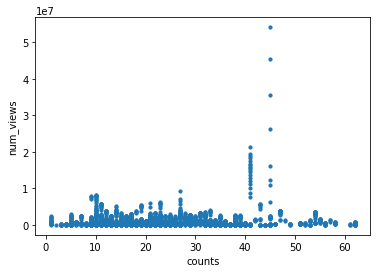

In [9]:
counts = list(youtube['count_tags'])
num_views = list(youtube['views'])

plt.scatter(counts,num_views, s=10)
plt.xlabel("counts")
plt.ylabel("num_views")

In [17]:
df = youtube[youtube['views'] > 5_000_000]
print(df.shape)
df.head()

(75, 6)


,title,tags,views,trending_date,publish_time,count_tags
69,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7224515,17.14.11,2017-11-10T07:38:29.000Z,9
329,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7563254,17.15.11,2017-11-10T07:38:29.000Z,9
569,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",7727696,17.16.11,2017-11-10T07:38:29.000Z,9
791,John Lewis Christmas Ad 2017 - #MozTheMonster,"[christmas, ""john lewis christmas"", ""john lewi...",8041928,17.17.11,2017-11-10T07:38:29.000Z,9
4001,42 HOLY GRAIL HACKS THAT WILL SAVE YOU A FORTUNE,"[5-Minute Crafts, ""DIY"", ""Do it yourself"", ""cr...",6315549,17.04.12,2017-12-03T08:30:00.000Z,45


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F25E761278>,
      dtype=object)

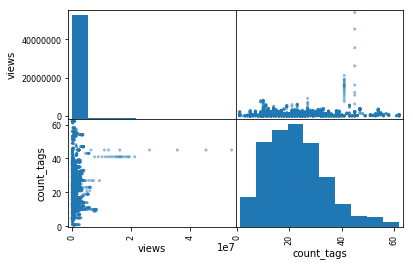

In [7]:
pd.plotting.scatter_matrix(youtube)